In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)#User Preference

In [2]:
mx_listings = pd.read_csv("C:/Users/Randy/Desktop/Data Analytics/listings.csv")

In [3]:
mx_listings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,22787,"Sunny suite w/ queen size bed, inside boutique...",87973,Diego,NaN,Cuauhtémoc,19.440760,-99.163240,Private room,1930,1,57,2019-05-27,0.49,8,343
1,35797,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.383990,-99.273350,Entire home/apt,3748,1,0,NaN,NaN,2,364
2,44616,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,Cuauhtémoc,19.410060,-99.176450,Private room,1893,1,43,2019-11-19,0.43,10,358
3,56074,Great space in historical San Rafael,265650,Maris,NaN,Cuauhtémoc,19.439370,-99.156140,Entire home/apt,693,4,60,2019-07-24,2.26,2,0
4,61792,Spacious Clean Quiet room (own bath) in la Con...,299558,Roberto,NaN,Cuauhtémoc,19.412590,-99.179590,Private room,1124,2,52,2019-11-03,1.91,2,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21472,41777595,Departamento en balbuena,327805515,Marisela,NaN,Venustiano Carranza,19.425070,-99.111660,Entire home/apt,1199,1,0,NaN,NaN,1,5
21473,41777774,"Seguro, Comodo y Tranquilo Departamento GTX",237439537,Diana,NaN,Tlalpan,19.240820,-99.149390,Entire home/apt,506,1,0,NaN,NaN,1,359
21474,41785233,Lindo departamento con amplio roof garden,330141085,Jose,NaN,Benito Juárez,19.367750,-99.149260,Private room,600,2,0,NaN,NaN,1,363
21475,41785803,Departamento vintage,221853426,Yesica,NaN,Azcapotzalco,19.464452,-99.156698,Entire home/apt,1199,3,0,NaN,NaN,1,172


In [4]:
mx_listings.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
mx_listings.isnull().sum() #Checking for null values

id                                    0
name                                  8
host_id                               0
host_name                             2
neighbourhood_group               21477
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        4687
reviews_per_month                  4687
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
mx_listings.fillna({'reviews_per_month':0}, inplace=True)
mx_listings.fillna({'name':"No_Name"}, inplace=True)
mx_listings.fillna({'host_name':"No_Name"}, inplace=True)
mx_listings.fillna({'last_review':"Not_Reviewed"}, inplace=True) #Replace nulls

In [7]:
mx_listings.isnull().sum() #Neighbourhood Group left untouched, relevent to analysis

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group               21477
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
mx_listings["price"].describe()

count     21477.000000
mean       1145.948224
std        3761.650114
min           0.000000
25%         394.000000
50%         693.000000
75%        1218.000000
max      349991.000000
Name: price, dtype: float64

In [9]:
plots=mx_listings['neighbourhood'].value_counts(normalize=True) #normalized to view

In [10]:
plots

Cuauhtémoc                0.393724
Benito Juárez             0.161196
Miguel Hidalgo            0.160451
Coyoacán                  0.085859
Álvaro Obregón            0.047539
Tlalpan                   0.041672
Cuajimalpa de Morelos     0.020860
Venustiano Carranza       0.017554
Gustavo A. Madero         0.015738
Iztapalapa                0.013643
Iztacalco                 0.013549
Azcapotzalco              0.011687
La Magdalena Contreras    0.007310
Xochimilco                0.006705
Tláhuac                   0.001676
Milpa Alta                0.000838
Name: neighbourhood, dtype: float64

In [11]:
plots.where(plots>0.04) # Looking for significant neighborhoods for visualization

Cuauhtémoc                0.393724
Benito Juárez             0.161196
Miguel Hidalgo            0.160451
Coyoacán                  0.085859
Álvaro Obregón            0.047539
Tlalpan                   0.041672
Cuajimalpa de Morelos          NaN
Venustiano Carranza            NaN
Gustavo A. Madero              NaN
Iztapalapa                     NaN
Iztacalco                      NaN
Azcapotzalco                   NaN
La Magdalena Contreras         NaN
Xochimilco                     NaN
Tláhuac                        NaN
Milpa Alta                     NaN
Name: neighbourhood, dtype: float64

In [12]:
#Average neighborhood price
neigh_price=mx_listings.groupby('neighbourhood')['price'].mean()

In [ ]:
ax = sns.violinplot(x="neighbourhood", y="price", hue="room_type", data=mx_listings)

In [13]:
airbnb_clean = mx_listings.copy()
airbnb_clean.drop(airbnb_clean[airbnb_clean.price > 2500].index, axis=0, inplace=True)
airbnb_clean.drop(airbnb_clean[airbnb_clean.price < 180].index, axis=0, inplace=True)
airbnb_clean.drop(airbnb_clean[airbnb_clean.minimum_nights > 30].index, axis=0, inplace=True)
catplot = airbnb_clean.copy()

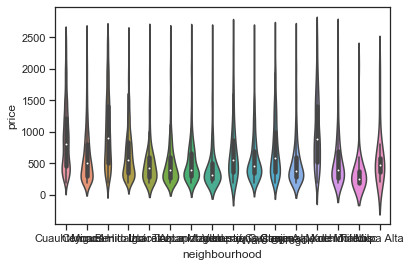

In [14]:
ax = sns.violinplot(x="neighbourhood", y="price", data=airbnb_clean)

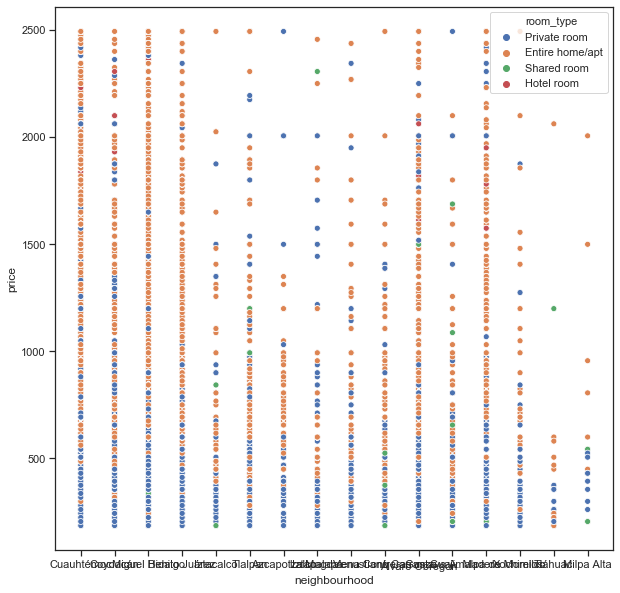

In [15]:
fig, ay = plt.subplots(figsize=(10, 10))
ay = sns.scatterplot(x="neighbourhood", y="price", hue='room_type', data=airbnb_clean)

In [16]:
splice = catplot.loc[(catplot["neighbourhood"] == 'Cuauhtémoc')|(catplot["neighbourhood"] == 'Benito Juárez')|(catplot["neighbourhood"] == 'Miguel Hidalgo')|(catplot["neighbourhood"] == 'Coyoacán')|(catplot["neighbourhood"] == 'Álvaro Obregón')|(catplot["neighbourhood"] == 'Tlalpan')]

In [17]:
splice #Spliced data set of signigicant neighbourhoods

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,22787,"Sunny suite w/ queen size bed, inside boutique...",87973,Diego,NaN,Cuauhtémoc,19.440760,-99.163240,Private room,1930,1,57,2019-05-27,0.49,8,343
2,44616,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,Cuauhtémoc,19.410060,-99.176450,Private room,1893,1,43,2019-11-19,0.43,10,358
3,56074,Great space in historical San Rafael,265650,Maris,NaN,Cuauhtémoc,19.439370,-99.156140,Entire home/apt,693,4,60,2019-07-24,2.26,2,0
4,61792,Spacious Clean Quiet room (own bath) in la Con...,299558,Roberto,NaN,Cuauhtémoc,19.412590,-99.179590,Private room,1124,2,52,2019-11-03,1.91,2,180
5,70644,Beautiful light Studio Coyoacan- full equipped !,212109,Trisha,NaN,Coyoacán,19.356010,-99.161670,Entire home/apt,1031,3,100,2020-01-08,1.03,3,346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21470,41775742,Mexican Escape,17497044,Monica,NaN,Benito Juárez,19.371709,-99.185461,Entire home/apt,750,2,0,Not_Reviewed,0.00,1,310
21471,41777077,Departamento 3 Recamaras Centro Histórico por Mes,327484629,Fany,NaN,Cuauhtémoc,19.427948,-99.141829,Entire home/apt,956,30,0,Not_Reviewed,0.00,20,179
21473,41777774,"Seguro, Comodo y Tranquilo Departamento GTX",237439537,Diana,NaN,Tlalpan,19.240820,-99.149390,Entire home/apt,506,1,0,Not_Reviewed,0.00,1,359
21474,41785233,Lindo departamento con amplio roof garden,330141085,Jose,NaN,Benito Juárez,19.367750,-99.149260,Private room,600,2,0,Not_Reviewed,0.00,1,363


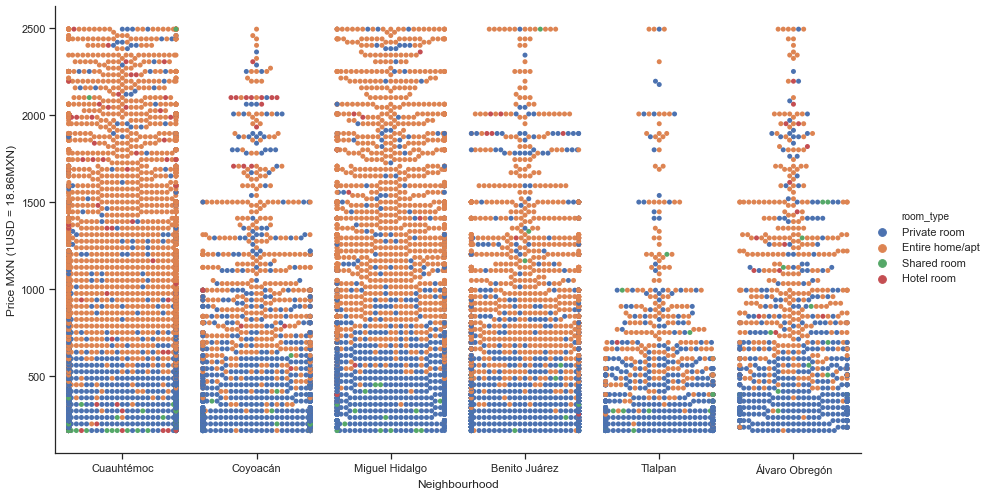

In [18]:
plotts=sns.catplot(x='neighbourhood',y='price',hue="room_type", kind="swarm", data=splice, height=7, aspect=1.75)
plotts.set_axis_labels('Neighbourhood', 'Price MXN (1USD = 18.86MXN)') #Exploration of SeaBorn Swarm Visualization